In [1]:
!pip install pandas ipython-sql


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import sqlite3

# Load the Excel sheet (default sheet or name it if needed)
df = pd.read_excel("cleaned_data.xlsx", sheet_name="CleanedData")  # adjust sheet name if different

# Preview data
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Time Slot,Request Date,Request hour,Request Day,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51:00 AM,Morning,2016-07-11,11,Monday,11-07-2016 01:00:00 PM
1,867,Airport,1.0,Trip Completed,11-07-2016 05:57:00 PM,Evening,2016-07-11,17,Monday,11-07-2016 06:47:00 PM
2,1807,City,1.0,Trip Completed,12-07-2016 09:17:00 AM,Morning,2016-07-12,9,Tuesday,12-07-2016 09:58:00 AM
3,2532,Airport,1.0,Trip Completed,12-07-2016 09:08:00 PM,Night,2016-07-12,21,Tuesday,12-07-2016 10:03:00 PM
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16 AM,Early Morning,2016-07-13,8,Wednesday,13-07-2016 09:25:47 AM


In [3]:
# Create SQLite connection
conn = sqlite3.connect(':memory:')

# Load DataFrame to SQL table
df.to_sql('uber_data', conn, index=False)

print("✅ Table 'uber_data' created successfully.")


✅ Table 'uber_data' created successfully.


In [4]:
pd.read_sql_query("""
SELECT [Time Slot], Status, COUNT(*) AS total
FROM uber_data
GROUP BY [Time Slot], Status
ORDER BY [Time Slot]
""", conn)

,Time Slot,Status,total
0,Afternoon,Cancelled,91
1,Afternoon,No Cars Available,228
2,Afternoon,Trip Completed,491
3,Early Morning,Cancelled,668
4,Early Morning,No Cars Available,323
5,Early Morning,Trip Completed,681
6,Evening,Cancelled,124
7,Evening,No Cars Available,1127
8,Evening,Trip Completed,642
9,Late Night,Cancelled,65


In [5]:
# Run the query and store the result in a DataFrame
query = """
SELECT [Time Slot], Status, COUNT(*) AS total
FROM uber_data
GROUP BY [Time Slot], Status
ORDER BY [Time Slot]
"""

result = pd.read_sql_query(query, conn)

# Save it to a CSV file
result.to_csv("time_slot_status_summary.csv", index=False)

# Optional: preview saved data
result.head()

,Time Slot,Status,total
0,Afternoon,Cancelled,91
1,Afternoon,No Cars Available,228
2,Afternoon,Trip Completed,491
3,Early Morning,Cancelled,668
4,Early Morning,No Cars Available,323


In [6]:
pd.read_sql_query("""
SELECT Status, COUNT(*) AS total_requests
FROM uber_data
GROUP BY Status
""", conn)

,Status,total_requests
0,Cancelled,1264
1,No Cars Available,2650
2,Trip Completed,2831


In [7]:
# Define the SQL query
query = """
SELECT Status, COUNT(*) AS total_requests
FROM uber_data
GROUP BY Status
"""

# Run the query and store the result
result = pd.read_sql_query(query, conn)

# Save the result as a CSV file
result.to_csv("requests_by_status.csv", index=False)

# Optional: preview the result
result.head()


,Status,total_requests
0,Cancelled,1264
1,No Cars Available,2650
2,Trip Completed,2831


In [8]:
pd.read_sql_query("""
SELECT [Request hour], COUNT(*) AS total_requests
FROM uber_data
GROUP BY [Request hour]
ORDER BY [Request hour]
""", conn)

,Request hour,total_requests
0,0,99
1,1,85
2,2,99
3,3,92
4,4,203
5,5,445
6,6,398
7,7,406
8,8,423
9,9,431


In [9]:
# Define the SQL query
query = """
SELECT [Request hour], COUNT(*) AS total_requests
FROM uber_data
GROUP BY [Request hour]
ORDER BY [Request hour]
"""

# Run the query and store the result
result = pd.read_sql_query(query, conn)

# Save the result as a CSV file
result.to_csv("requests_by_hour.csv", index=False)

# Optional: preview the result
result.head()

,Request hour,total_requests
0,0,99
1,1,85
2,2,99
3,3,92
4,4,203


In [10]:
pd.read_sql_query("""
SELECT [Pickup point], COUNT(*) AS cancelled_rides
FROM uber_data
WHERE Status = 'Cancelled'
GROUP BY [Pickup point]
""", conn)

,Pickup point,cancelled_rides
0,Airport,198
1,City,1066


In [11]:
# Define the SQL query
query = """
SELECT [Pickup point], COUNT(*) AS cancelled_rides
FROM uber_data
WHERE Status = 'Cancelled'
GROUP BY [Pickup point]
"""

# Run the query and store the result
result = pd.read_sql_query(query, conn)

# Save the result as a CSV file
result.to_csv("cancellations_by_pickup_point.csv", index=False)

# Optional: preview the result
result.head()

,Pickup point,cancelled_rides
0,Airport,198
1,City,1066


In [12]:
pd.read_sql_query("""
SELECT [Request Day],
       SUM(CASE WHEN Status = 'Trip Completed' THEN 1 ELSE 0 END) AS completed,
       COUNT(*) AS total,
       ROUND((SUM(CASE WHEN Status = 'Trip Completed' THEN 1 ELSE 0 END) * 100.0) / COUNT(*), 2) AS completion_rate
FROM uber_data
GROUP BY [Request Day]
""", conn)


,Request Day,completed,total,completion_rate
0,Friday,561,1381,40.62
1,Monday,601,1367,43.96
2,Thursday,530,1353,39.17
3,Tuesday,562,1307,43.00
4,Wednesday,577,1337,43.16


In [13]:
# Define the SQL query
query = """
SELECT [Request Day],
       SUM(CASE WHEN Status = 'Trip Completed' THEN 1 ELSE 0 END) AS completed,
       COUNT(*) AS total,
       ROUND((SUM(CASE WHEN Status = 'Trip Completed' THEN 1 ELSE 0 END) * 100.0) / COUNT(*), 2) AS completion_rate
FROM uber_data
GROUP BY [Request Day]
"""

# Run the query and store the result
result = pd.read_sql_query(query, conn)

# Save the result as a CSV file
result.to_csv("trip_completion_rate_by_day.csv", index=False)

# Optional: preview the result
result.head()

,Request Day,completed,total,completion_rate
0,Friday,561,1381,40.62
1,Monday,601,1367,43.96
2,Thursday,530,1353,39.17
3,Tuesday,562,1307,43.00
4,Wednesday,577,1337,43.16


In [14]:
# Define the SQL query
query = """
SELECT [Time Slot],
       COUNT(*) AS total_requests,
       SUM(CASE WHEN Status = 'Cancelled' THEN 1 ELSE 0 END) AS cancelled_requests
FROM uber_data
WHERE [Time Slot] IN ('Early Morning', 'Night')
GROUP BY [Time Slot]
"""

# Run the query and store the result
result = pd.read_sql_query(query, conn)

# Save the result as a CSV file
result.to_csv("early_morning_vs_night_cancellations.csv", index=False)

# Optional: preview the result
result.head()

,Time Slot,total_requests,cancelled_requests
0,Early Morning,1672,668
1,Night,947,64


In [1]:
import pandas as pd

df = pd.read_excel("cleaned_data.xlsx", sheet_name="CleanedData")  # or your latest file
df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Time Slot,Request Date,Request hour,Request Day,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51:00 AM,Morning,2016-07-11,11,Monday,11-07-2016 01:00:00 PM
1,867,Airport,1.0,Trip Completed,11-07-2016 05:57:00 PM,Evening,2016-07-11,17,Monday,11-07-2016 06:47:00 PM
2,1807,City,1.0,Trip Completed,12-07-2016 09:17:00 AM,Morning,2016-07-12,9,Tuesday,12-07-2016 09:58:00 AM
3,2532,Airport,1.0,Trip Completed,12-07-2016 09:08:00 PM,Night,2016-07-12,21,Tuesday,12-07-2016 10:03:00 PM
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16 AM,Early Morning,2016-07-13,8,Wednesday,13-07-2016 09:25:47 AM


In [2]:
df.info()           # data types, non-null counts
df.shape            # rows and columns
df.columns          # column names
df.describe()       # numerical summary
df.nunique()        # unique values per column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   object        
 5   Time Slot          6745 non-null   object        
 6   Request Date       6745 non-null   datetime64[ns]
 7   Request hour       6745 non-null   int64         
 8   Request Day        6745 non-null   object        
 9   Drop timestamp     2831 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 527.1+ KB


Request id           6745
Pickup point            2
Driver id             300
Status                  3
Request timestamp    5618
Time Slot               6
Request Date            5
Request hour           24
Request Day             5
Drop timestamp       2598
dtype: int64

In [3]:
df['Status'].value_counts()
df['Pickup point'].value_counts()
df['Time Slot'].value_counts()
df['Request Day'].value_counts()


Request Day
Friday       1381
Monday       1367
Thursday     1353
Wednesday    1337
Tuesday      1307
Name: count, dtype: int64

In [4]:
df.isnull().sum()
df.duplicated().sum()


np.int64(0)

In [5]:
df.groupby('Request hour')['Request id'].count()


Request hour
0      99
1      85
2      99
3      92
4     203
5     445
6     398
7     406
8     423
9     431
10    243
11    171
12    184
13    160
14    136
15    171
16    159
17    418
18    510
19    473
20    492
21    449
22    304
23    194
Name: Request id, dtype: int64

In [6]:
df.groupby('Request Day')['Request id'].count()


Request Day
Friday       1381
Monday       1367
Thursday     1353
Tuesday      1307
Wednesday    1337
Name: Request id, dtype: int64

In [7]:
df[df['Status'] != 'Trip Completed'].groupby('Time Slot')['Status'].value_counts()


Time Slot      Status           
Afternoon      No Cars Available     228
               Cancelled              91
Early Morning  Cancelled             668
               No Cars Available     323
Evening        No Cars Available    1127
               Cancelled             124
Late Night     No Cars Available     299
               Cancelled              65
Morning        Cancelled             252
               No Cars Available     189
Night          No Cars Available     484
               Cancelled              64
Name: count, dtype: int64

In [8]:
df.groupby('Pickup point')['Status'].value_counts(normalize=True)


Pickup point  Status           
Airport       No Cars Available    0.529030
              Trip Completed       0.409821
              Cancelled            0.061149
City          Trip Completed       0.428857
              Cancelled            0.303964
              No Cars Available    0.267180
Name: proportion, dtype: float64

In [10]:
!pip install matplotlib seaborn


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 644.1 kB/s eta 0:00:12
   -- ------------------------------------- 0.5/8.1 MB 644.1 kB/s eta 0:00:12
   --- ------------------------------------ 0.8/8.1 MB 541.1 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/8.1 MB 541.1 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/8.1 MB 541.1 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/8.1 MB 541.1 kB/s eta 0:00:14
   ----- ---------------------------------- 1.0/8.1 MB 465.9 kB/s eta 0:00:16
   ----- ---------------------------------- 1.0/8.1 MB 465.9 kB/s eta 0:00:16
   ----- ----------------------


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9320\3969912434.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status', palette='Set2')


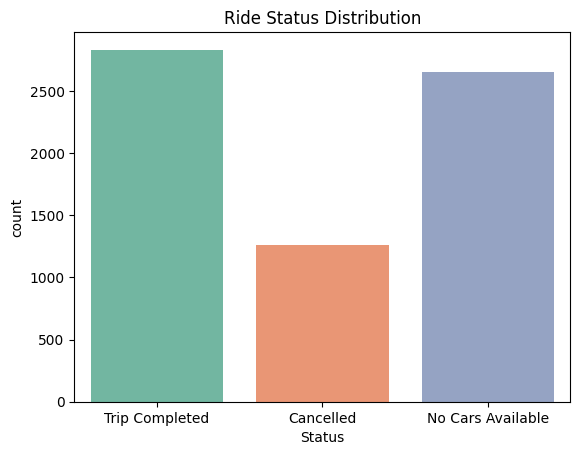

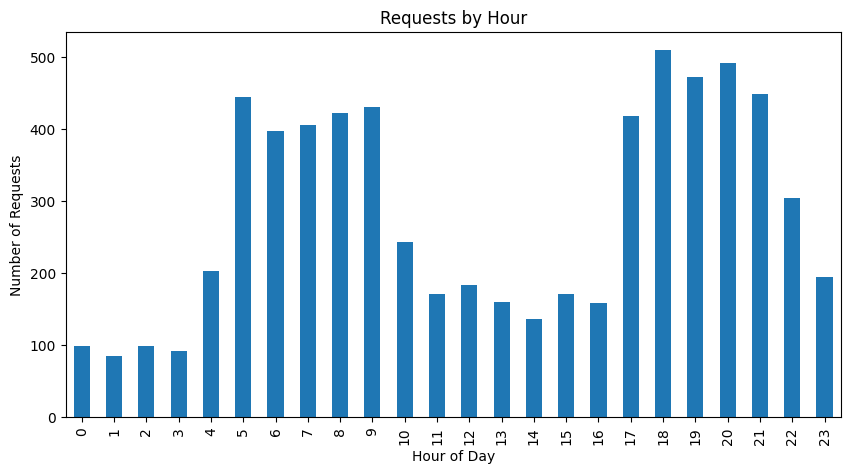

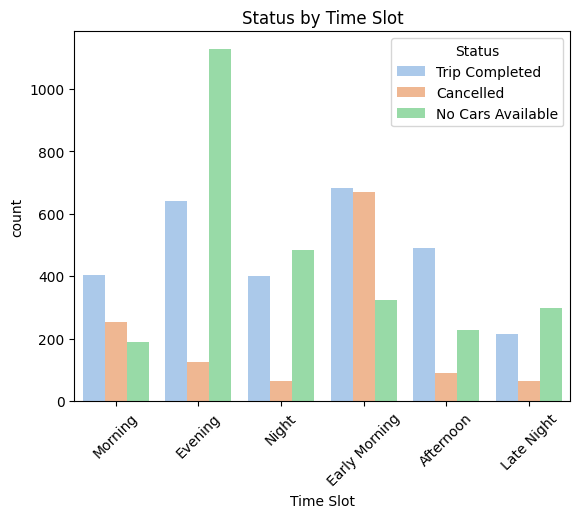

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Status counts
sns.countplot(data=df, x='Status', palette='Set2')
plt.title("Ride Status Distribution")
plt.show()

# Requests per Hour
df['Request hour'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.title("Requests by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.show()

# Status by Time Slot
sns.countplot(data=df, x='Time Slot', hue='Status', palette='pastel')
plt.title("Status by Time Slot")
plt.xticks(rotation=45)
plt.show()


In [12]:
df.to_csv("cleaned_data_for_eda.csv", index=False)
